In this blog, I will explain what's linear regression and how it works. <br>

-  ***what's simple linear regression*** <br>

let's say you want to predict the housing price in Chicago. What information you would like to know?<br>

-  __Location?__ Lincoln Park,or Logan Square, or Lake view, or South Loop<br>
-  __Transportation?__, any CTA route nearby?<br>
-  __Average drive time to Chicago Loop?__, 10 min/20min/30min/or above<br>
-  __What is the school district rating?__, 1,2,3,..<br>
-  __What's the historical crime rate in this area?__, 1/month, 5/month, 10/month <br>

Then you request your housing agent to send you a list of houses sold on the market and their corresponding location, transportation, driving time, schools ratings, crime rate.<br>

By reviewing the information, you start to get a sense of how the house will be priced based on these five factors. Therefore, when your housing agent takes you to a house purchasing tour, you roughly know how the house would be priced.<br>

Simply speaking, you are executing a conceptual regression model in your mind to guess the potential price of a given house. <br>

The location, transportation, average drive time, schools district rating, and crime rate are __predictor variables__ in our regression; while the housing price is the __target variable__ you are trying to predict. __By giving the historical input & output pairs, you map out the relationship__ (e.g. linear regression) __between the input__ (e.g. crime rate) __and output__ (e.g. housing price).

-  ***linear regression example in sklearn*** <br>

Let's use the Boston housing data set as an example. 

In [1]:
# import libraries
from sklearn import datasets
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# load the example dataset and take a look the dataset
boston = datasets.load_boston()
y = boston.target
x = boston.data
print('how many inputs varaible/predictor varaible:',x.shape[1])
print('how many rows of data:',x.shape[0])

how many inputs varaible/predictor varaible: 13
how many rows of data: 506


For the simple linear regression example, we pick up only one input varaible - average number of rooms per dwelling - for demonstration, which is the 6th out of 13 features in the dataset. In addition, I only select the first 10 records out of the 506 records for simplicity.

In [3]:
# select those 10 data points for training the model
y = boston.target[0:10]
x = boston.data[:,np.newaxis,5][0:10]

# select those 5 data points for testing the model
y_test = boston.target[10:15]
x_test = boston.data[:,np.newaxis,5][10:15]

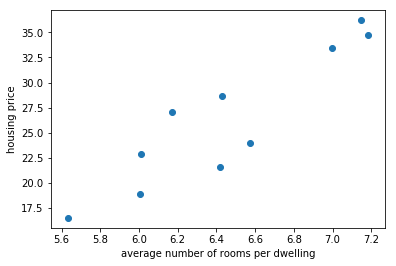

In [4]:
# plot those 10 points
plt.scatter(x, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.show()

Let's find a line to fit those ten data points.

In [5]:
# set linear regression as the model
model = linear_model.LinearRegression()

# fit the model with (input, output)
model.fit(x, y)

# output the linear regression model coefficients and intercept
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

# make the prediction using the training data
y_pred = model.predict(x)

# output the linear regression evaluation metrics: 
# training error and the R-square
print('Training Error: ',sklearn.metrics.mean_squared_error(y, y_pred))
print('R-square: ',sklearn.metrics.r2_score(y, y_pred))

Coefficients:  [11.82850406]
Intercept:  -49.98256496765094
Training Error:  6.783211453077881
R-square:  0.8365569983837435


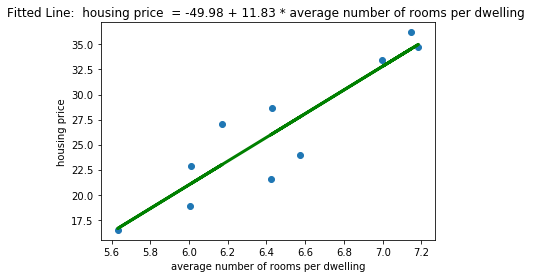

In [6]:
# Plot the line
plt.scatter(x, y)
plt.plot(x, y_pred, color='green', linewidth=3)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.show()

Obviously, this line will not predict well for a hous has house less than 5, it will predict a negative housing price, which will never happen. Reason is because we only feed the model a very small dataset, and all the number of room this this toy data set is bigger than 5.

So far, we only ask the model to predict the data point it has seen before, those 10. What if we want to ask the model to predict some data point it never seen before. Let's try the 11th data point for the boston data set and take a look.

In [7]:
print('three new input - average number of rooms per dwelling:\n',x_test)

three new input - average number of rooms per dwelling:
 [[6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]]


In [8]:
# make the prediction using the new input
y_test_pred = model.predict(x_test)
print('three predicted output - predicted housing price: \n', y_test_pred)

three predicted output - predicted housing price: 
 [25.44780542 21.09491593 19.67549544 20.38520569 22.12399578]


In [9]:
# output the linear regression evaluation metrics: testing error 
print('Testing Error: ',sklearn.metrics.mean_squared_error(y_test, y_test_pred))

Testing Error:  26.694174914639955


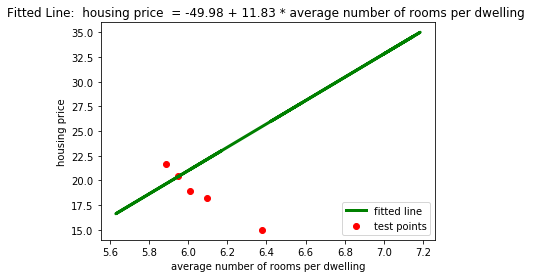

In [10]:
# Add the test set in to the plot
# plt.scatter(x, y,label="training points")
plt.scatter(x_test, y_test,color='red',label="test points")
plt.plot(x, y_pred, color='green', linewidth=3,label="fitted line")
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.legend(loc='lower right')
plt.show()

For these three new data points, the line get one housing price correct, while the other two points' predicted price is slightly overestimated, and underestimated.

***Four additional important concept in linear regression:*** <br>
- ***what is the best fitting line?*** <br>
the best fitting line is define as a straight line minimize the error between where the straight line predict the dot to be and where the dot actually is. The error here is called the least squared error. By minimizing this error, the machine/model is finding the best line (the best \beta_1 and \beta_0) to map the input $x_1$ to output $y$. <br>

- ***what is coefficient?*** <br>
Coefficient is the $\beta_1$. It means when input $x_1$ increase 1 unit, output $y$ increase $\beta_1$ unit correspondingly.<br>

- ***what is intercept?*** <br>
Intercept is the $\beta_0$. It means when input $x_1$ equals 0 unit, output $y$ equals $\beta_0$.<br>

- ***what is the R-square?*** <br>
R-square is a measurement used in regression to assess how good the model represent/explain the relationship between x and y.
Ranging from 0 to 1, 0 means the model explain nothing, while 1 means the model explain perfectly the relationship.